# Multiclass Classification Using Decision Tree

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [3]:
# Loading the dataset
data = pd.read_csv(r"B:\Training\BIA\Machine Learning\For Students\Day_4\04_DECISION TREES AND ENSEMBLE METHODS\iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Data Pre-processing

In [4]:
# Creating a dataset back up
df = data.copy()

# Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Duplicates
df_duplicate = df[df.duplicated()]
print("Count of duplicate rows: ", df_duplicate.shape[0])
df_duplicate

Count of duplicate rows:  3


,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


In [6]:
# Deleting duplicate
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


### EDA

In [7]:
# Descriptive Statistics
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Checking class distribution for target variable
df['species'].value_counts()

versicolor    50
virginica     49
setosa        48
Name: species, dtype: int64

In [10]:
import seaborn as sns

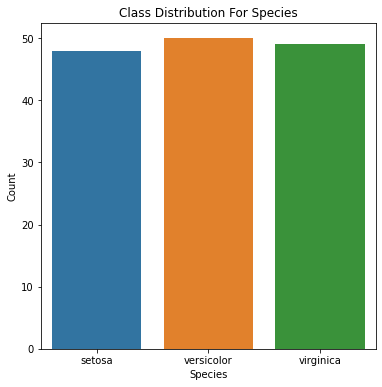

In [12]:
# Plotting the class distribution for target variable
plt.figure(figsize = (6,6))
sns.countplot(x = df['species'])
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Class Distribution For Species')
plt.show()

<Figure size 1080x576 with 0 Axes>

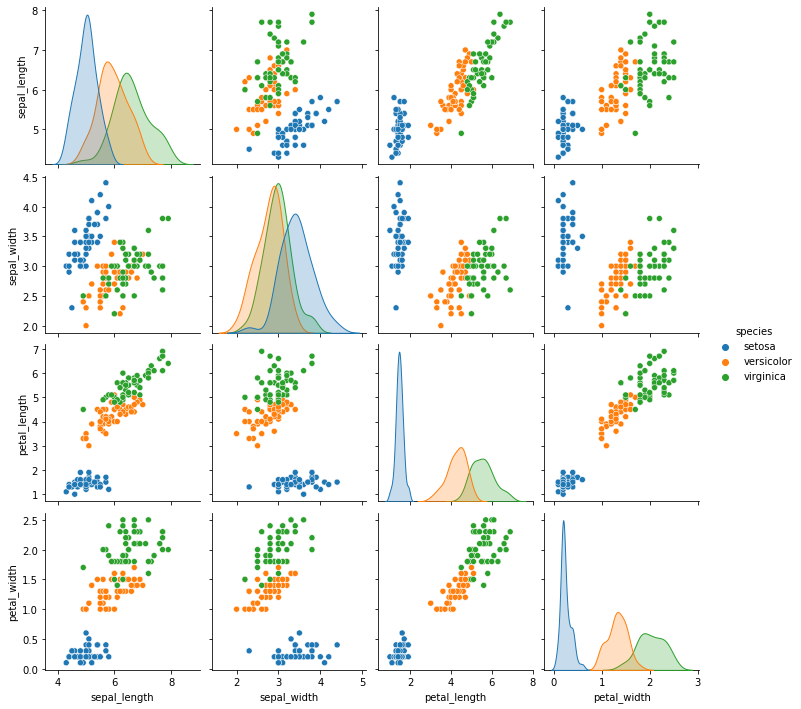

In [13]:
# Plotting the corelation among numeric features
plt.figure(figsize = (15,8))
sns.pairplot(data = df, hue = 'species')
plt.show()

In [14]:
# Setting X & y
X = df.drop(columns = ['species'])
y = df['species']

# Converting categorical values in 'y' with numeric values
# df['species'].unique()
y_encoded, y_category = pd.factorize(y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 42)



### Model Building & Training

In [15]:
# Model building
clf = DecisionTreeClassifier()

# Model training
clf.fit(X_train, y_train)

DecisionTreeClassifier()

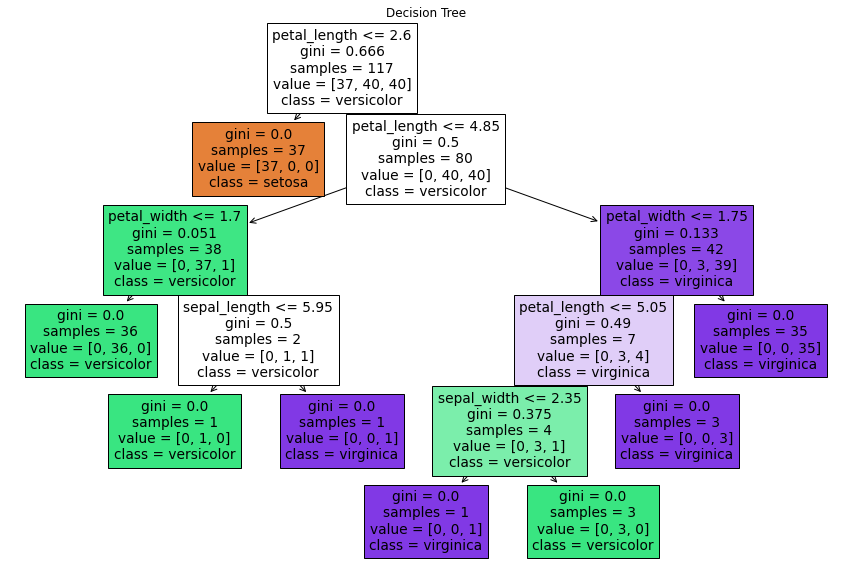

In [17]:
# Visualizing the decision tree
plt.figure(figsize = (15,10))
plot_tree(clf, feature_names = X.columns, class_names = y.unique(), filled = True)
plt.title("Decision Tree")
plt.savefig('my_decision.tree.png')
plt.show()

In [18]:
# Prediction
y_pred = clf.predict(X_test)

# Getting back original labels for target variable
y_test_label = y_category[y_test]
y_pred_label = y_category[y_pred]

# Creating a daframe with actual and predicted values
df_predict = pd.DataFrame({'Actual': y_test_label, 'Predicted': y_pred_label})
df_predict.head(10)

,Actual,Predicted
0,virginica,virginica
1,versicolor,versicolor
2,virginica,virginica
3,setosa,setosa
4,virginica,versicolor
5,setosa,setosa
6,versicolor,versicolor
7,setosa,setosa
8,versicolor,virginica
9,setosa,setosa


In [20]:
# Model Performance
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = 'weighted')
recall = metrics.recall_score(y_test, y_pred, average = 'weighted')
f1_score = metrics.f1_score(y_test, y_pred, average = 'weighted')

# Printing the values
print(f'accuracy: {accuracy:.2f}')
print(f'precision: {precision:.2f}')
print(f'recall: {recall:.2f}')
print(f'f1_score: {f1_score:.2f}') 
      

accuracy: 0.93
precision: 0.93
recall: 0.93
f1_score: 0.93
